```
Student-1
Name: Md Sarafat Ali Adir
ID# 20-41926-1
```

```
Student-2
Name: Hasin Aabrar Khan
ID# 21-45297-2
```

```
Student-3
Name: MD Tanvir Bin Zoha
ID# 21-45307-2
```



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here



*   Import all necessary libraries.



In [2]:
# load/import all required library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.utils import shuffle



•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution
np.random.seed(123)
df = pd.read_csv('loan_sanction_train.csv')
df = shuffle(df)
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
583  LP002898   Male     Yes          1      Graduate            No   
11   LP001027   Male     Yes          2      Graduate           NaN   
443  LP002422   Male      No          1      Graduate            No   
442  LP002418   Male      No         3+  Not Graduate            No   
267  LP001882   Male     Yes         3+      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
583             1880                0.0        61.0             360.0   
11              2500             1840.0       109.0             360.0   
443            37719                0.0       152.0             360.0   
442             4707             1993.0       148.0             360.0   
267             4333             1811.0       160.0             360.0   

     Credit_History Property_Area Loan_Status  
583             NaN         Rural           N  
11              1.0         Urban           Y  
443             1.0     Semiurban           Y  
442             1.0     Semiurban           Y  
267             0.0         Urban           Y

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [4]:
# write task-2 solution 

duplicated_rows = df.duplicated().any()
print("Have Duplicated Rows: ", duplicated_rows)

df.drop_duplicates(inplace=True)

empty_cells = df.isnull().sum().sum()
print("Number Of Empty Cells: ", empty_cells)

df.fillna(df.mean(numeric_only=True), inplace=True)


category_columns = df.select_dtypes(include=['object']).columns

for column in category_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

df.drop(columns = ['Loan_ID'], inplace = True)
print("\nData Types:")
print(df.dtypes)




Have Duplicated Rows:  False
Number Of Empty Cells:  149

Data Types:
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

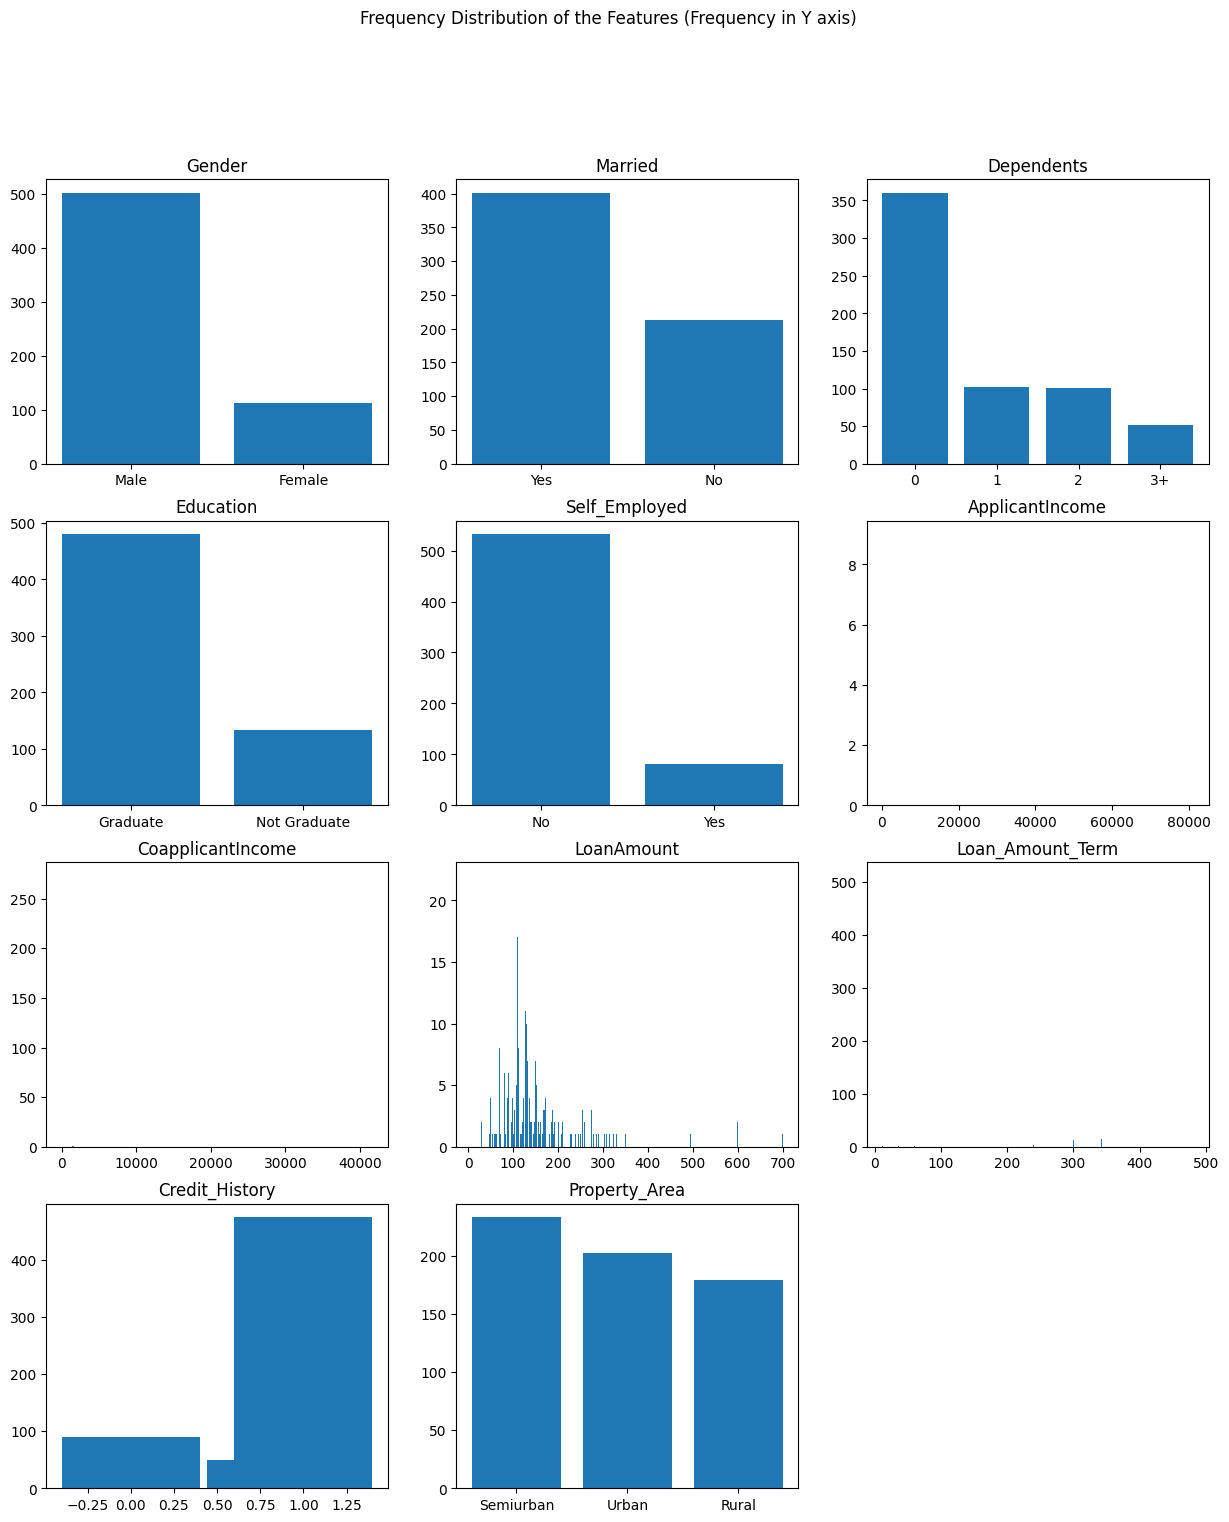

In [5]:
# write task-3 solution

plt.figure(figsize=(15, 17))

for i, column in enumerate(df.columns[:-1]):
  frequency = df[column].value_counts()
  plt.subplot(4, 3, i+1)
  plt.bar(frequency.index, frequency.values)
  plt.title(column)

plt.suptitle("Frequency Distribution of the Features (Frequency in Y axis)")

plt.show()

•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [6]:
# write task-4 solution

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']

label_encoder = LabelEncoder()
for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])

x=  df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

scaler = StandardScaler()
x = scaler.fit_transform(x)

print("\nData Types:")
print(df.dtypes)



Data Types:
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [7]:
# write task-5 solution

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3241)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (491, 11) (491,)
Testing Data Shape: (123, 11) (123,)


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [8]:
# write task-6 solution

model = SVC(C=10)
model.fit(X_train,y_train)



SVC(C=10)

•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

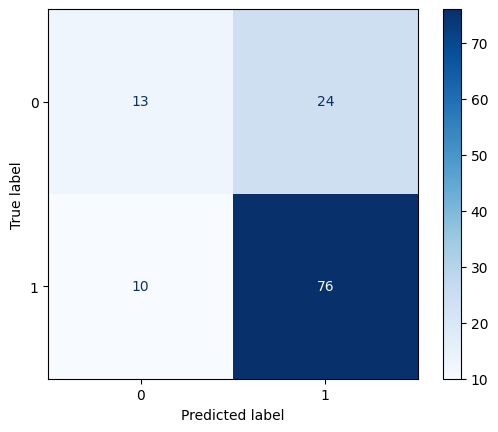

In [9]:
# write task-7 solution

actual = y_test
predicted = model.predict(X_test)

confusion = confusion_matrix(actual, predicted)
cm_display =ConfusionMatrixDisplay(confusion)
cm_display.plot(cmap='Blues')


•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [10]:
# write task-8 solution

test_score = model.score(X_test,y_test)
train_score = model.score(X_train,y_train)

print("Training Score: ", train_score)
print("Testing Score: ", test_score)
print("Accuracy Difference (Train - Test): ", train_score - test_score)


Training Score:  0.8920570264765784
Testing Score:  0.7235772357723578
Accuracy Difference (Train - Test):  0.1684797907042206
